In [2]:
!pip install trimesh



File saved at: /content/terrain_surface.obj


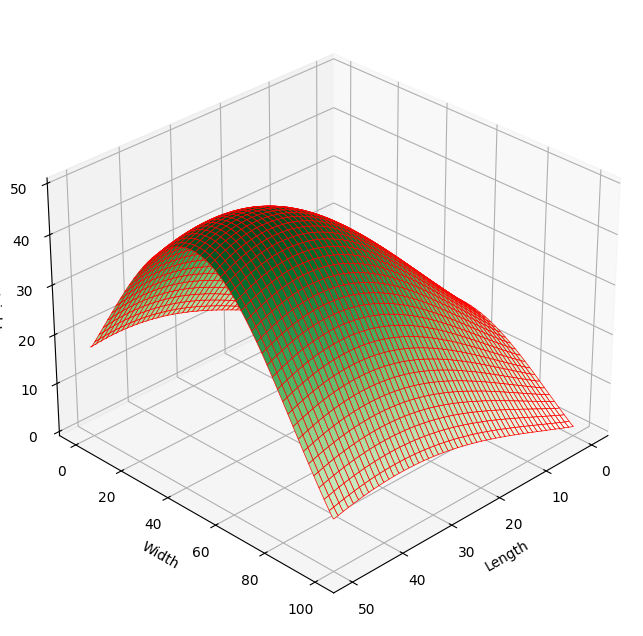

In [5]:
import numpy as np
import trimesh
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter
from matplotlib.path import Path

class TerrainSurface:
    def __init__(self, params=None):
        # Default parameters
        self.default_params = {
            # Basic dimensions
            'length': 100,          # Length of the surface
            'width': 60,            # Width of the surface
            'resolution': 400,      # Grid resolution
            'max_height': 10.0,      # Maximum height of the surface

            # Surface characteristics
            'base_height': 1.0,     # Base height of the surface
            'height_variation': 0.5, # How much height varies from base
            'smoothness': 1.0,      # Smoothness factor (higher = smoother)

            # Terrain features
            'n_hills': 3,           # Number of major elevation changes
            'hill_size': 20,        # Size of elevation features
            'hill_height': 0.5,     # Height of elevation features

            # Visualization
            'cmap': 'Greens',       # Color map for visualization
            'contour_color': 'red', # Color of contour lines
            'contour_width': 0.5,   # Width of contour lines
            'view_angle': (30, 45)  # (elevation, azimuth) for 3D view
        }

        # Update with provided parameters
        self.params = self.default_params.copy()
        if params:
            self.params.update(params)

    def generate_surface(self):
        """Generate the terrain surface based on parameters"""
        # Create coordinate grid
        x = np.linspace(0, self.params['length'], self.params['resolution'])
        y = np.linspace(0, self.params['width'], self.params['resolution'])
        self.X, self.Y = np.meshgrid(x, y)

        # Initialize height map
        self.Z = np.ones_like(self.X) * self.params['base_height']

        # Add major elevation features (hills)
        for _ in range(self.params['n_hills']):
            # Random position for each hill
            cx = np.random.uniform(0, self.params['length'])
            cy = np.random.uniform(0, self.params['width'])

            # Create gaussian hill
            hill = self.params['hill_height'] * np.exp(
                -((self.X - cx)**2 + (self.Y - cy)**2) /
                (2 * self.params['hill_size']**2)
            )
            self.Z += hill

        # Normalize height to desired range
        self.Z = (self.Z - self.Z.min()) / (self.Z.max() - self.Z.min())
        self.Z = self.Z * self.params['height_variation'] + self.params['base_height']

        # Apply smoothing
        self.Z = gaussian_filter(self.Z, sigma=self.params['smoothness'])

        # Create mesh
        vertices = np.column_stack((self.X.flatten(), self.Y.flatten(), self.Z.flatten()))

        # Create faces
        faces = []
        res = self.params['resolution']
        for i in range(res-1):
            for j in range(res-1):
                vertex = i * res + j
                faces.append([vertex, vertex+1, vertex+res])
                faces.append([vertex+1, vertex+res+1, vertex+res])

        self.mesh = trimesh.Trimesh(vertices=vertices, faces=faces)
        return self.mesh

    def save_and_show(self, filename="terrain_surface.obj"):
        """Save the mesh and show visualization"""
        # Save mesh
        current_dir = os.getcwd()
        full_path = os.path.join(current_dir, filename)
        self.mesh.export(full_path)
        print(f"\nFile saved at: {full_path}")

        # Create visualization
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Plot surface
        surf = ax.plot_surface(self.X, self.Y, self.Z,
                             cmap=self.params['cmap'],
                             edgecolor=self.params['contour_color'],
                             linewidth=self.params['contour_width'])

        # Set view angle
        ax.view_init(elev=self.params['view_angle'][0],
                    azim=self.params['view_angle'][1])

        # Set labels
        ax.set_xlabel('Length')
        ax.set_ylabel('Width')
        ax.set_zlabel('Height')

        plt.show()

# Example usage
if __name__ == "__main__":
    # Define custom parameters (optional)
    params = {
        'length': 50,
        'width': 100,
        'max_height': 50,
        'base_height': 0,
        'height_variation': 50.0,
        'smoothness': 2.0,
        'n_hills': 2,
        'hill_size': 30,
        'hill_height': 15
    }

    # Create and generate surface
    terrain = TerrainSurface(params)
    terrain.generate_surface()
    terrain.save_and_show()